# 📊 Financial Analysis of Credit Card and Customer Data

## 🎯 Project Objective
The goal of this project is to analyze the relationships between customer demographics and their credit card usage. We will explore how factors such as education level, customer jobs, gender, house ownership, and personal loans influence financial behavior. This analysis will utilize SQL queries within Jupyter Notebook to uncover insights that can inform strategic decisions.



## 1. Setup and Import Libraries

In [19]:
import sqlite3

In [21]:
import pandas as pd

In [23]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

### Setting Seaborn style for plots

In [28]:
sns.set(style="whitegrid")

## 2. Load Datasets into Pandas DataFrames

###  Load the datasets

In [38]:
credit_card_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\credit_card.csv")

In [42]:
customer_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\customer.csv")

### 3. Display the first few rows of each DataFrame

In [46]:
credit_card_df.head(), customer_df.head()

(   Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
 0   708082083          Blue          200                   0   
 1   708083283          Blue          445                   1   
 2   708084558          Blue          140                   0   
 3   708085458          Blue          250                   1   
 4   708086958          Blue          320                   1   
 
    Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  Credit_Limit  \
 0                 87      01-01-2023   Week-1  Q1          2023        3544.0   
 1                108      01-01-2023   Week-1  Q1          2023        3421.0   
 2                106      01-01-2023   Week-1  Q1          2023        8258.0   
 3                150      01-01-2023   Week-1  Q1          2023        1438.3   
 4                106      01-01-2023   Week-1  Q1          2023        3128.0   
 
    Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
 0                 1661            15149             

#### Create an SQLite database in memory

In [53]:
conn = sqlite3.connect(":memory:")

#### Load the datasets into the SQLite database

In [56]:
credit_card_df.to_sql("credit_card", conn, index=False, if_exists="replace")

10108

In [58]:
customer_df.to_sql("customer", conn, index=False, if_exists="replace")

10108

### 4. Join the Two Datasets on Client_Num

### 🔗 Joining Credit Card and Customer Data
We will join the `credit_card` and `customer` tables using the `Client_Num` column.

##### SQL query to join the two datasets

In [78]:
query = """
SELECT 
    cc.Client_Num,
    cc.Card_Category,
    cc.Annual_Fees,
    cc.Activation_30_Days,
    cc.Customer_Acq_Cost,
    cc.Week_Start_Date,
    cc.Week_Num,
    cc.Qtr,
    cc.current_year,
    cc.Credit_Limit,
    cc.Total_Revolving_Bal,
    cc.Total_Trans_Amt,
    cc.Total_Trans_Vol,
    cc.Avg_Utilization_Ratio,
    cc.[Use Chip],
    cc.[Exp Type],
    cc.Interest_Earned,
    cc.Delinquent_Acc,
    cu.Customer_Age,
    cu.Gender,
    cu.Dependent_Count,
    cu.Education_Level,
    cu.Marital_Status,
    cu.state_cd,
    cu.Zipcode,
    cu.Car_Owner,
    cu.House_Owner,
    cu.Personal_loan,
    cu.contact,
    cu.Customer_Job,
    cu.Income,
    cu.Cust_Satisfaction_Score
FROM 
    credit_card cc
JOIN 
    customer cu
ON 
    cc.Client_Num = cu.Client_Num
"""

##### Execute the query and load the result into a DataFrame

In [80]:
combined_df = pd.read_sql(query, conn)

##### Display the first few rows of the joined DataFrame

In [83]:
combined_df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,...,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,...,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,...,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,...,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,...,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


###  SQL Analyses

### 1. 🎓 Average Credit Limit by Education Level
We will calculate the average credit limit for customers across different education levels.

##### SQL query to calculate average credit limit by education level

In [90]:
query = """
SELECT 
    Education_Level, 
    AVG(Credit_Limit) AS Avg_Credit_Limit 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Education_Level
"""

##### Execute the query and load the result into a DataFrame

In [93]:
education_credit_limit_df = pd.read_sql(query, conn)

##### Diplay result

In [99]:
education_credit_limit_df

,Education_Level,Avg_Credit_Limit
0,Doctorate,8615.492461
1,Graduate,8683.456459
2,High School,8488.589647
3,Post-Graduate,8598.775775
4,Uneducated,8712.561497
5,Unknown,8643.437492


##### Visualize the average credit limit by education level

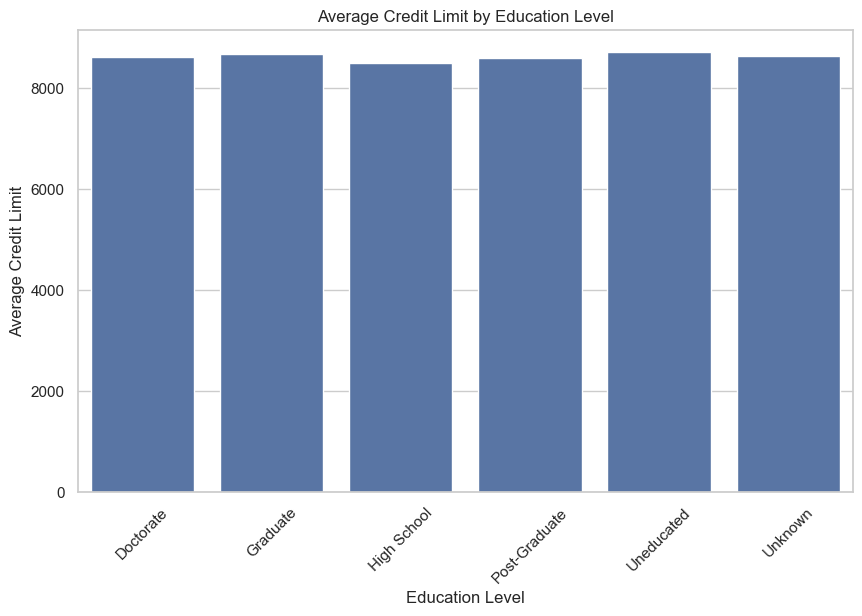

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Education_Level", y="Avg_Credit_Limit", data=education_credit_limit_df)
plt.title("Average Credit Limit by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Credit Limit")
plt.xticks(rotation=45)
plt.show()

### 2. 💼 Credit Card Usage by Customer Job Type
We'll examine how credit card usage varies based on the customer's job type.

##### SQL query to analyze credit card usage by job type

In [108]:
query = """
SELECT 
    Customer_Job, 
    SUM(Total_Trans_Amt) AS Total_Trans_Amt, 
    SUM(Total_Trans_Vol) AS Total_Trans_Vol 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Customer_Job
ORDER BY 
    Total_Trans_Amt DESC
"""


##### Execute the query and load the result into a DataFrame

In [111]:
job_credit_usage_df = pd.read_sql(query, conn)

##### Display result

In [114]:
job_credit_usage_df

,Customer_Job,Total_Trans_Amt,Total_Trans_Vol
0,Businessman,14285412,154200
1,White-collar,8221742,111733
2,Govt,6507875,104785
3,Selfemployeed,6395026,124977
4,Blue-collar,5488838,95602
5,Retirees,3623120,64354


##### Visualize credit card usage by job type

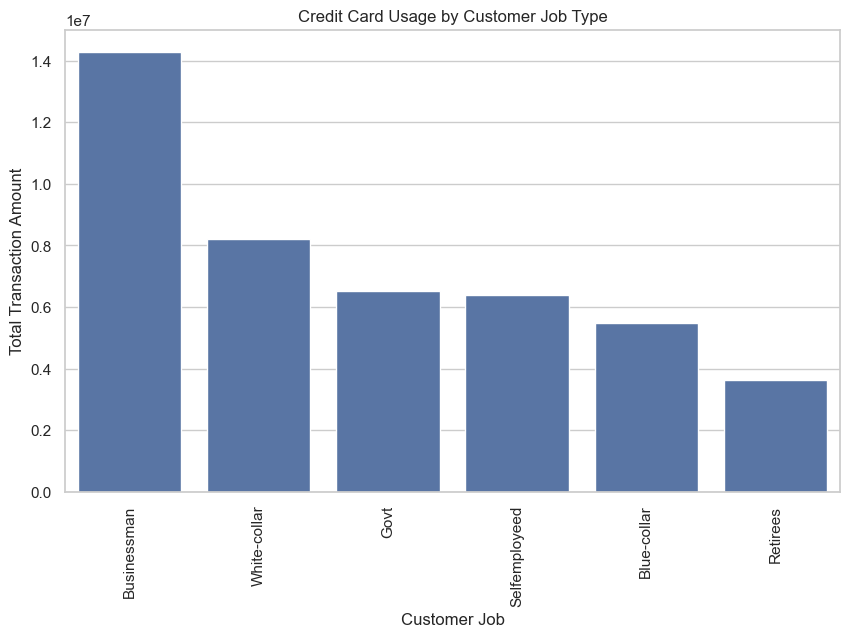

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Customer_Job", y="Total_Trans_Amt", data=job_credit_usage_df)
plt.title("Credit Card Usage by Customer Job Type")
plt.xlabel("Customer Job")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=90)
plt.show()

### 3. 👫 Gender Distribution in Credit Card Categories
We'll explore the distribution of different credit card categories between male and female customers.

##### SQL query to analyze gender distribution in credit card categories

In [121]:
query = """
SELECT 
    Gender, 
    Card_Category, 
    COUNT(*) AS Count 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Gender, 
    Card_Category
ORDER BY 
    Gender, 
    Card_Category
"""

##### Execute the query and load the result into a DataFrame

In [124]:
gender_card_category_df = pd.read_sql(query, conn)

##### Display result

In [130]:
gender_card_category_df

,Gender,Card_Category,Count
0,F,Blue,5385
1,F,Gold,96
2,F,Platinum,34
3,F,Silver,365
4,M,Blue,3829
5,M,Gold,92
6,M,Platinum,33
7,M,Silver,274


##### Visualize gender distribution in credit card categories

<Figure size 1200x600 with 0 Axes>

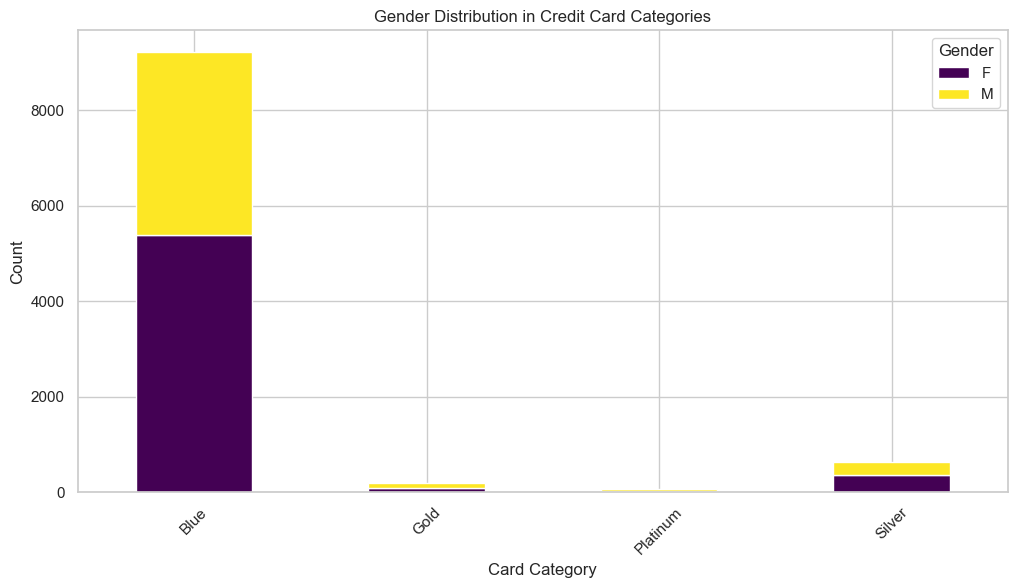

In [290]:
plt.figure(figsize=(12, 6)) # Set up the figure
gender_card_category_pivot = gender_card_category_df.pivot_table(
    index='Card_Category', 
    columns='Gender',  # Create a pivot table for stacked bar chart
    values='Count', 
    aggfunc='sum'
)
gender_card_category_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis') # Plot the stacked bar chart
plt.title("Gender Distribution in Credit Card Categories") # Add title and labels
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show() # Show the plot

### 4. 🏠 House Ownership and Credit Utilization
We'll examine whether house ownership influences credit card utilization.

##### SQL query to analyze credit utilization by house ownership

In [134]:
query = """
SELECT 
    House_Owner, 
    AVG(Avg_Utilization_Ratio) AS Avg_Utilization_Ratio 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    House_Owner
"""

##### Execute the query and load the result into a DataFrame

In [137]:
house_utilization_df = pd.read_sql(query, conn)

##### Display Result

In [140]:
house_utilization_df

,House_Owner,Avg_Utilization_Ratio
0,no,0.274160
1,yes,0.275639


##### Visualize credit utilization by house ownership

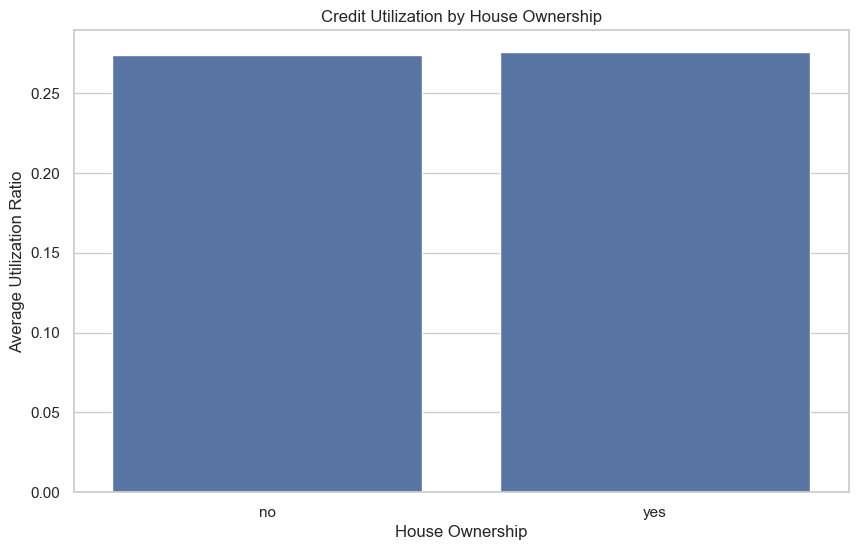

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x="House_Owner", y="Avg_Utilization_Ratio", data=house_utilization_df)
plt.title("Credit Utilization by House Ownership")
plt.xlabel("House Ownership")
plt.ylabel("Average Utilization Ratio")
plt.show()

### 5.💳 Credit Limit by Personal Loan Status
We will analyze how having a personal loan affects the credit limit of customers.

##### SQL query to analyze credit limit by personal loan status

In [147]:
query = """
SELECT 
    Personal_loan, 
    AVG(Credit_Limit) AS Avg_Credit_Limit 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Personal_loan
"""

##### Execute the query and load the result into a DataFrame

In [152]:
loan_credit_limit_df = pd.read_sql(query, conn)

##### Display Result

In [155]:
loan_credit_limit_df

,Personal_loan,Avg_Credit_Limit
0,no,8650.703956
1,yes,8532.322862


##### Visualize credit limit by personal loan status

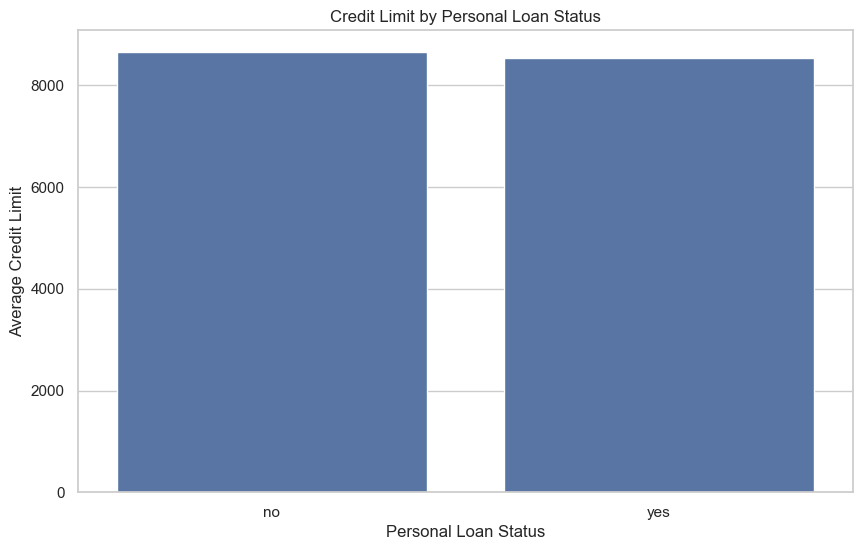

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Personal_loan", y="Avg_Credit_Limit", data=loan_credit_limit_df)
plt.title("Credit Limit by Personal Loan Status")
plt.xlabel("Personal Loan Status")
plt.ylabel("Average Credit Limit")
plt.show()

### 6. 🚨 Delinquency Rate by Income
We will explore the relationship between income levels and delinquency rates.

##### SQL query to analyze delinquency rate by income

In [162]:
query = """
SELECT 
    Income, 
    AVG(Delinquent_Acc) AS Avg_Delinquent_Acc 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Income
"""

##### Execute the query and load the result into a DataFrame

In [165]:
income_delinquency_df = pd.read_sql(query, conn)

##### Display Result

In [170]:
income_delinquency_df.head(5) 

,Income,Avg_Delinquent_Acc
0,1250,0.090909
1,2565,0.041667
2,5225,0.097561
3,5525,0.080645
4,6550,0.105263


### 7.🌟 Customer Satisfaction and Credit Card Features
We will analyze how different credit card features affect customer satisfaction.

##### SQL query to analyze customer satisfaction by credit card features

In [179]:
query = """
SELECT 
    Card_Category, 
    AVG(Cust_Satisfaction_Score) AS Avg_Satisfaction 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Card_Category
"""

##### Execute the query and load the result into a DataFrame

In [182]:
satisfaction_df = pd.read_sql(query, conn)

##### Display Result

In [185]:
satisfaction_df

,Card_Category,Avg_Satisfaction
0,Blue,3.193727
1,Gold,3.042553
2,Platinum,2.716418
3,Silver,3.217527


##### Visualize customer satisfaction by credit card features

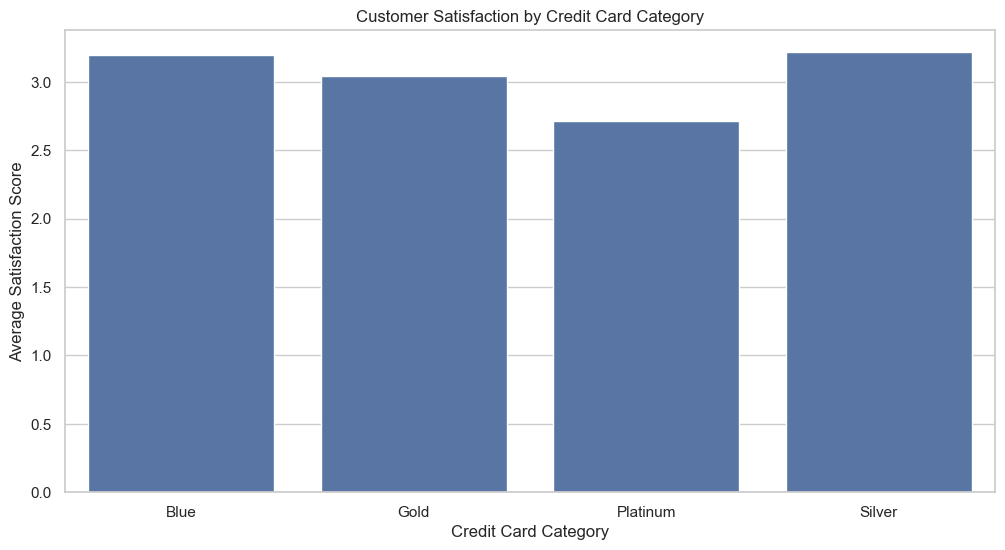

In [188]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Card_Category", y="Avg_Satisfaction", data=satisfaction_df)
plt.title("Customer Satisfaction by Credit Card Category")
plt.xlabel("Credit Card Category")
plt.ylabel("Average Satisfaction Score")
plt.show()

### 8. 📈 Activation Rate and Credit Limit
We'll explore if higher credit limits are associated with a higher activation rate within 30 days.

##### SQL query to analyze activation rate by credit limit

In [192]:
query = """
SELECT 
    Credit_Limit, 
    AVG(Activation_30_Days) AS Avg_Activation_30_Days 
FROM 
    credit_card cc
GROUP BY 
    Credit_Limit
"""

##### Execute the query and load the result into a DataFrame

In [195]:
activation_credit_limit_df = pd.read_sql(query, conn)

##### Display Result

In [200]:
activation_credit_limit_df.head()

,Credit_Limit,Avg_Activation_30_Days
0,1438.3,0.584158
1,1439.0,0.000000
2,1440.0,1.000000
3,1441.0,0.500000
4,1442.0,1.000000


### 9. 👴 Credit Card Category Distribution Across Age Groups
We'll analyze how credit card categories are distributed among different age groups.

##### SQL query to analyze credit card categories by age group

In [207]:
query = """
SELECT 
    CASE 
        WHEN Customer_Age BETWEEN 18 AND 25 THEN '18-25'
        WHEN Customer_Age BETWEEN 26 AND 35 THEN '26-35'
        WHEN Customer_Age BETWEEN 36 AND 45 THEN '36-45'
        WHEN Customer_Age BETWEEN 46 AND 55 THEN '46-55'
        ELSE '56+' 
    END AS Age_Group, 
    Card_Category, 
    COUNT(*) AS Count 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    Age_Group, 
    Card_Category
ORDER BY 
    Age_Group
"""

##### Execute the query and load the result into a DataFrame

In [210]:
age_card_category_df = pd.read_sql(query, conn)

##### Display Result

In [213]:
age_card_category_df 

,Age_Group,Card_Category,Count
0,18-25,Blue,15
1,18-25,Gold,3
2,18-25,Silver,2
3,26-35,Blue,852
4,26-35,Gold,4
5,26-35,Platinum,3
6,26-35,Silver,59
7,36-45,Blue,3445
8,36-45,Gold,57
9,36-45,Platinum,21


##### Visualize credit card category distribution across age groups

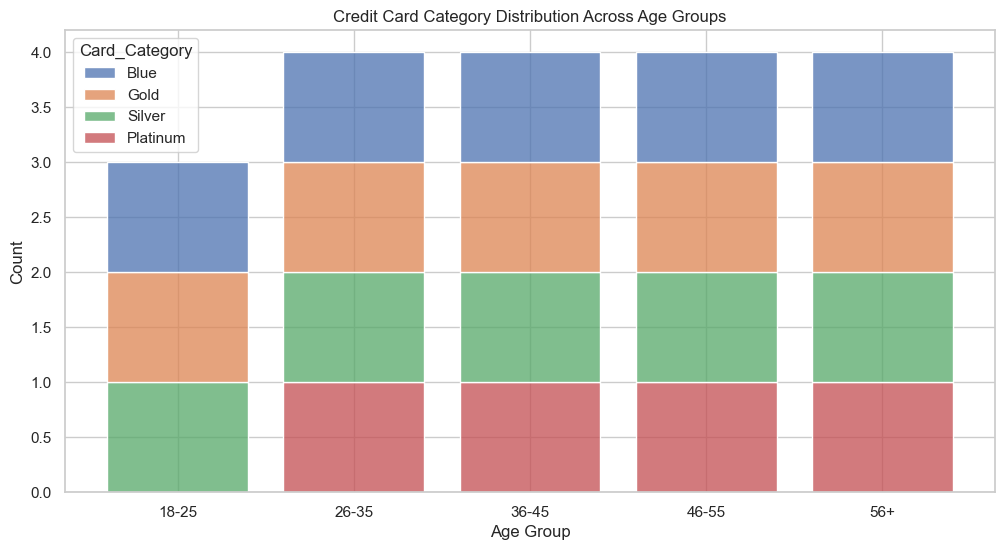

In [237]:
plt.figure(figsize=(12, 6))
sns.histplot(data=age_card_category_df, x="Age_Group", hue="Card_Category", multiple="stack", shrink=0.8)
plt.title("Credit Card Category Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

### 10. 🗺️ State-wise Credit Card Usage
We'll conduct a state-wise analysis of total credit card usage.

##### SQL query to analyze state-wise credit card usage

In [220]:
query = """
SELECT 
    state_cd, 
    SUM(Total_Trans_Amt) AS Total_Trans_Amt, 
    SUM(Total_Trans_Vol) AS Total_Trans_Vol 
FROM 
    credit_card cc
JOIN 
    customer cu 
ON 
    cc.Client_Num = cu.Client_Num
GROUP BY 
    state_cd
ORDER BY 
    Total_Trans_Amt DESC
"""

##### Execute the query and load the result into a DataFrame

In [223]:
state_usage_df = pd.read_sql(query, conn)

##### Display Result

In [226]:
state_usage_df 

,state_cd,Total_Trans_Amt,Total_Trans_Vol
0,TX,10314288,152476
1,NY,10258352,149875
2,CA,10121249,155107
3,FL,7797286,113393
4,NJ,3443779,48266
5,IL,294908,3845
6,MI,293540,4098
7,IA,234732,3273
8,NV,203548,3320
9,VA,155266,2074


##### Visualize state-wise credit card usage

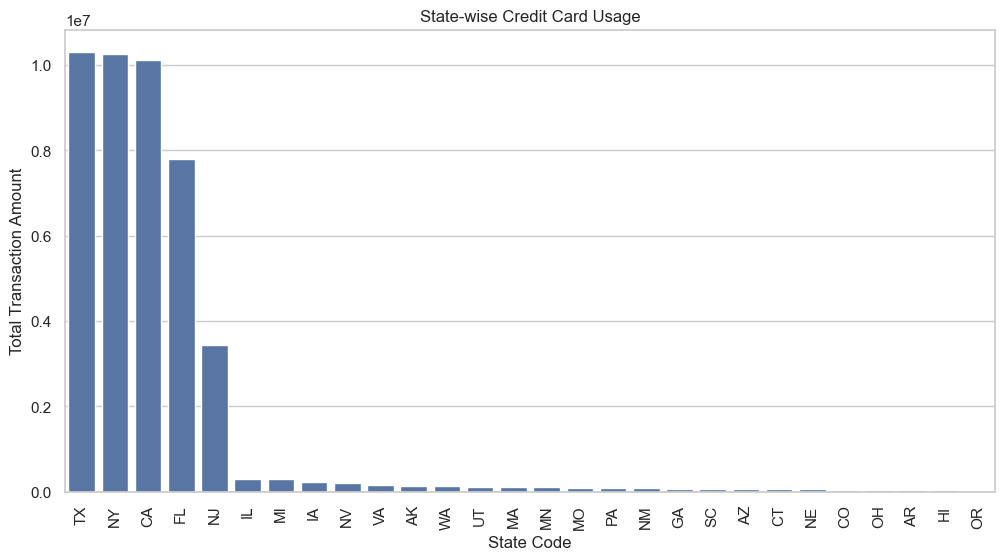

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(x="state_cd", y="Total_Trans_Amt", data=state_usage_df)
plt.title("State-wise Credit Card Usage")
plt.xlabel("State Code")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=90)
plt.show()

### 11. 👩‍🎓 Average Customer Satisfaction Score by Gender
We will analyze the average cuatomer satisfaction score by gender

#### Execute the query and load the result into DataFrame

In [255]:
query = """
SELECT 
    Gender, 
    AVG(Cust_Satisfaction_Score) AS Avg_Satisfaction_Score
FROM 
    customer
GROUP BY 
    Gender;
"""

In [257]:
satisfaction_by_gender_df = pd.read_sql_query(query, conn)

##### Display Rsult

In [259]:
satisfaction_by_gender_df

,Gender,Avg_Satisfaction_Score
0,F,3.197109
1,M,3.178335


### 12. 📚 Average Customer Satisfaction Score by Education Level

##### Execute the query and load it into the DataFrame

In [265]:
query = """
SELECT 
    Education_Level, 
    AVG(Cust_Satisfaction_Score) AS Avg_Satisfaction_Score
FROM 
    customer
GROUP BY 
    Education_Level;
"""

In [267]:
satisfaction_by_education_df = pd.read_sql_query(query, conn)

##### Display the result

In [275]:
satisfaction_by_education_df

,Education_Level,Avg_Satisfaction_Score
0,Doctorate,3.128603
1,Graduate,3.167150
2,High School,3.241911
3,Post-Graduate,3.153101
4,Uneducated,3.193527
5,Unknown,3.205941


### Conclusion
Each of these analyses offers a detailed perspective on financial data, shedding light on customer behavior, credit card usage, and financial patterns. The insights derived from this analysis can be instrumental in helping a company refine its strategies, enhance customer satisfaction, and optimize its product offerings. By understanding these trends and relationships, businesses can make more informed decisions that align with customer needs and market dynamics.

### George Zacharia